<a href="https://colab.research.google.com/github/Mahrokh-Eb/Machine-Learning-With-Python/blob/master/1_1_1_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip3 install bcolz 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/numpy/cifar-10-batches-py

/content/drive/MyDrive/numpy/cifar-10-batches-py


In [5]:
import numpy as np

In [6]:
!python --version

Python 3.7.12


In [7]:
print(np.__version__)

1.19.5


In [8]:
#dir(np)

In [9]:
#help(np.where)

In [10]:
#np.where?

In [11]:
x = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [12]:
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [13]:
print(np.where(x>5, x, 0))

[[0 0 0]
 [0 0 6]
 [7 8 9]]


In [14]:
print(np.array([1,2,3]))

[1 2 3]


In [15]:
print(type)

<class 'type'>


In [16]:
print(type(x))

<class 'numpy.ndarray'>


In [17]:
A = np.array([[1,2,3], [4,5,6]])

In [18]:
print(A)

[[1 2 3]
 [4 5 6]]


In [19]:
print(type(A))

<class 'numpy.ndarray'>


In [20]:
print(A.shape)

(2, 3)


In [21]:
print(x.shape)

(3, 3)


In [22]:
print(x.shape[0])

3


In [23]:
 print(np.reshape(A, (3,2)))

[[1 2]
 [3 4]
 [5 6]]


## **Reshape a matrix from column to row vector**

In [24]:
print(np.reshape(A,(1, -1)))

[[1 2 3 4 5 6]]


In [25]:
print(np.reshape(A, (-1, 1)))

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [26]:
 print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


# Reshape to two-dimenssion

In [27]:
y = np.array([1,2,3])

In [28]:
print(y[ None, :])

[[1 2 3]]


In [29]:
print(y[:, None])

[[1]
 [2]
 [3]]


In [30]:
print(y[:, np.newaxis])

[[1]
 [2]
 [3]]


# Array dimenssion

In [31]:
print(x.ndim)

2


In [32]:
print(y.ndim)

1


# Data type

In [33]:
print(x.dtype)

int64


In [34]:
c= np.array([1,2,3], dtype=np.float32)

In [35]:
print(c)

[1. 2. 3.]


In [36]:
print(np.arange(1, 20, step=2))

[ 1  3  5  7  9 11 13 15 17 19]


In [37]:
#np.arange?

In [38]:
print(np.linspace(1,2, num=5))

[1.   1.25 1.5  1.75 2.  ]


In [39]:
print(np.logspace(2, 5, 10, base=2))

[ 4.          5.0396842   6.34960421  8.         10.0793684  12.69920842
 16.         20.1587368  25.39841683 32.        ]


In [40]:
np.set_printoptions(formatter={'all':lambda x: '%.2f' %x})

In [41]:
print(np.logspace(2, 5, 10, base=2))

[4.00 5.04 6.35 8.00 10.08 12.70 16.00 20.16 25.40 32.00]


# Creating specific arrays

In [42]:
print(np.zeros(shape=(2,3), dtype=np.int32))

[[0.00 0.00 0.00]
 [0.00 0.00 0.00]]


In [43]:
print(5 * np.ones(shape=(2,3)))

[[5.00 5.00 5.00]
 [5.00 5.00 5.00]]


In [44]:
print(np.reshape(np.arange(1, 10), (3,3)))

[[1.00 2.00 3.00]
 [4.00 5.00 6.00]
 [7.00 8.00 9.00]]


In [45]:
print(np.fliplr(np.eye(4,4)))

[[0.00 0.00 0.00 1.00]
 [0.00 0.00 1.00 0.00]
 [0.00 1.00 0.00 0.00]
 [1.00 0.00 0.00 0.00]]


# Create random arrays

In [46]:
print(np.random.randn(3,3))

[[-1.18 1.77 -1.23]
 [-0.29 2.05 -1.12]
 [-0.23 0.88 -1.70]]


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

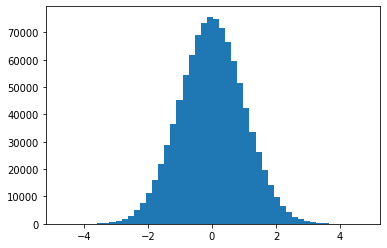

In [48]:
 x = np.random.randn(1000000)
 plt.hist(x, bins=50);

In [49]:
print(np.count_nonzero(np.random.randint(6, size=(2, 4))))

7


In [50]:
#help(np.abs)

In [51]:
x = np.array([1,2,3])
print(x)

[1.00 2.00 3.00]


In [52]:
print(x.shape)

(3,)


In [53]:
y = np.array([[1,2,3], [4,5,6]])
print(y)

[[1.00 2.00 3.00]
 [4.00 5.00 6.00]]


In [54]:
print(np.reshape(y, (1, -1)))

[[1.00 2.00 3.00 4.00 5.00 6.00]]


In [55]:
print(x.size)

3


In [56]:
import keras
import os

In [57]:
import os
import pickle

def load_cifar10_batch(filename):
    """ Load a single batch from CIFAR10 """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
        return X, Y
    
def load_cifar10(dir):
    """ Load all batches of CIFAR10 """
    # load train batch file
    xs = []
    ys = []
    
    for i in range(1, 6):
        filename = os.path.join(dir, 'data_batch_%d' % i)
        X, Y = load_cifar10_batch(filename)
        xs.append(X)
        ys.append(Y)
        
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    
    # load test batch
    Xte, Yte = load_cifar10_batch(os.path.join(dir, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [58]:
X_train, y_train, X_test, y_test = load_cifar10('/content/drive/MyDrive/numpy/cifar-10-batches-py')

In [59]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [60]:
print(y_train[:10])

[6.00 9.00 9.00 4.00 1.00 1.00 2.00 7.00 8.00 3.00]


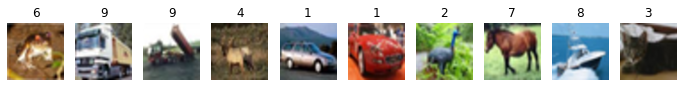

In [61]:
plt.figure(figsize=(12, 2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].astype('uint8'), interpolation='spline16')
    plt.title('%d' % y_train[i])
    plt.axis('off')

In [62]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000,)


# Visualize data

In [63]:
 class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'track'] 

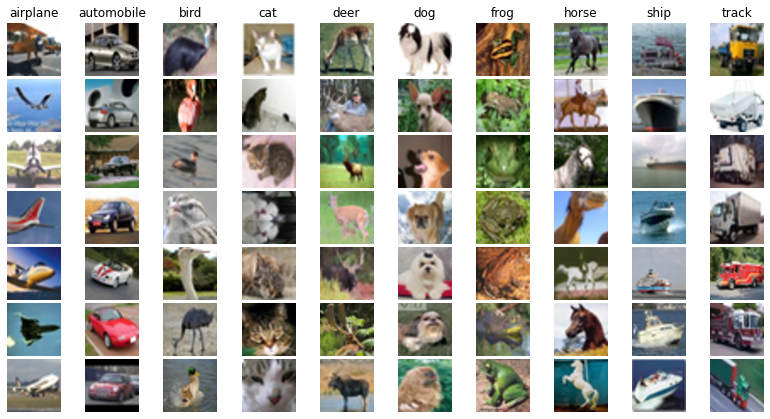

In [64]:

plt.figure(figsize=(12, 6))
plt.subplots_adjust(0, 0, 0.9, 0.9, wspace=0.05, hspace=0.05)
samples_per_class = 7
num_classes = len(class_names)
for c, class_name in enumerate(class_names):
    idxes = np.flatnonzero(y_train == c)
    samples_idxes = np.random.choice(idxes, samples_per_class, replace=False)
    for i, idx in enumerate(samples_idxes):
        plt_idx = i * num_classes + c + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype(np.uint8), interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[c])

# Operations on numpy arrays

In [65]:
A = np.array([[1,2,3], [4,5,6]])
print(A)

[[1.00 2.00 3.00]
 [4.00 5.00 6.00]]


In [66]:
print(A.shape)

(2, 3)


In [67]:
print(A.shape[1])

3


In [68]:
print(np.reshape(A, (1, -1)))

[[1.00 2.00 3.00 4.00 5.00 6.00]]


In [69]:
print(x)

[1.00 2.00 3.00]


In [70]:
print(x[:, None])

[[1.00]
 [2.00]
 [3.00]]


In [71]:
print(x.ndim)

1


In [72]:
print(A.ndim)

2


In [73]:
print(A.size)

6


In [74]:
print(A.itemsize)

8


In [75]:
x = np.arange(1, 21, 2)
print(x)

[1.00 3.00 5.00 7.00 9.00 11.00 13.00 15.00 17.00 19.00]


In [76]:
x = np.linspace(1, 2, num=5)
print(x)  

[1.00 1.25 1.50 1.75 2.00]


In [77]:
x = np.logspace(1, 5, num=5, base=2)
print(x)

[2.00 4.00 8.00 16.00 32.00]


In [78]:
np.set_printoptions(precision=2)

In [79]:
print(np.zeros(shape=(4,4)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [80]:
print(np.ones(shape=(4,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [81]:
print(np.full(shape=(4,4), fill_value=4))

[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]


In [82]:
print(np.random.randn(2,4))

[[-0.14 -0.11  1.41  1.15]
 [-2.25 -0.74 -1.38 -0.78]]


# matplot

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

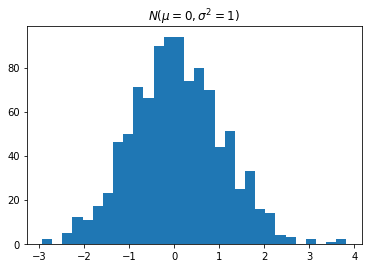

In [84]:
x = np.random.randn(1000)
plt.hist(x, bins=30)
plt.title("$N(\mu=0, \sigma^2=1)$")
plt.show()

In [85]:
b = np.random.randint(2, size=(1,20))
print(b)

[[0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1]]


In [86]:
print(np.count_nonzero(b))

9


In [87]:
x = np.array([[1,2,3], [4,6,7]])
print(x)
print()
print(x.T)

[[1 2 3]
 [4 6 7]]

[[1 4]
 [2 6]
 [3 7]]


In [88]:
for func in (x.min, x.max, x.sum, x.mean, x.std, x.var):
  print(func.__name__, '=', func())

min = 1
max = 7
sum = 23
mean = 3.8333333333333335
std = 2.1147629234082532
var = 4.472222222222222


In [89]:
print(np.sum(x, axis=(0,1)))

23


In [90]:
print(np.mean(x, axis=0))

[2.5 4.  5. ]


In [91]:
x = np.arange(5).reshape(1,1,5)
print(x)

[[[0 1 2 3 4]]]


In [92]:
x = np.arange(1,13).reshape(4,3)
print(x)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [93]:
v = np.array([1,0,1])
y = np.zeros_like(x)
for i in range(4):
  y[i, :] = x[i, :]+ v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [94]:
y = x + v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


### Stack

In [95]:
A  = np.full((3,4), 1)
print(A)
print()
B = np.full((3,4), 2)
print(B)
print()
print(np.hstack((A, B)))

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]

[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]

[[1 1 1 1 2 2 2 2]
 [1 1 1 1 2 2 2 2]
 [1 1 1 1 2 2 2 2]]


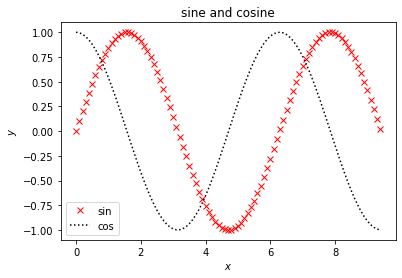

In [96]:
x = np.arange(0, 3*np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, 'rx')
plt.plot(x, y2, 'k:')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('sine and cosine')
plt.legend(['sin', 'cos']);

# Scikit Learn -- sklearn

In [97]:
from sklearn.datasets import load_iris
iris = load_iris()

In [98]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [99]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [100]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [101]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [102]:
print(np.unique(iris.target, return_counts=True))

(array([0, 1, 2]), array([50, 50, 50]))


In [103]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


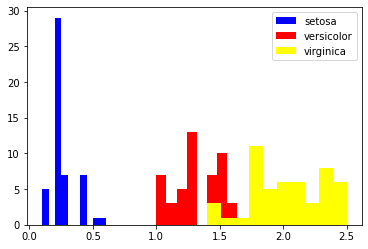

In [104]:
colors = ['blue', 'red', 'yellow']
x_index = 3
for label, color in zip(range(len(iris.target_names)) , colors):
  plt.hist(iris.data[iris.target==label, x_index],
           label=iris.target_names[label], 
           color=color)

plt.legend()
plt.show()

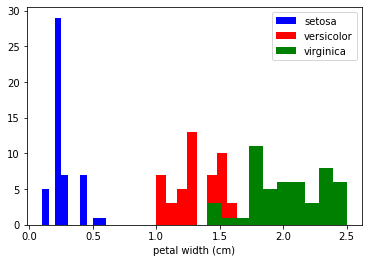

In [105]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):  # [(0, 'blue'), (1, 'red'), (2, 'green')]
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

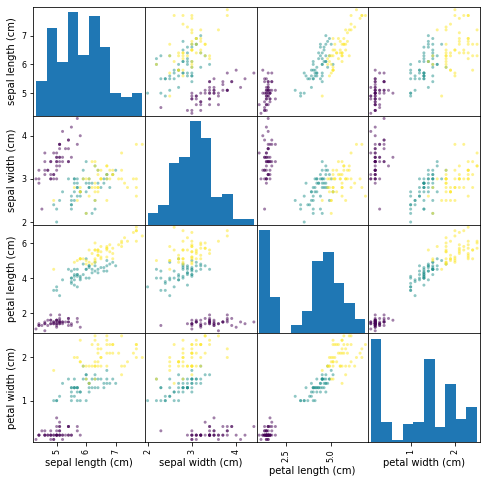

In [106]:
import pandas as pd
iris_df = pd.DataFrame( iris.data, columns= iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c= iris.target, figsize=(8,8));

In [107]:
from sklearn import datasets
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [108]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [109]:
print(digits.target)

[0 1 2 ... 8 9 8]


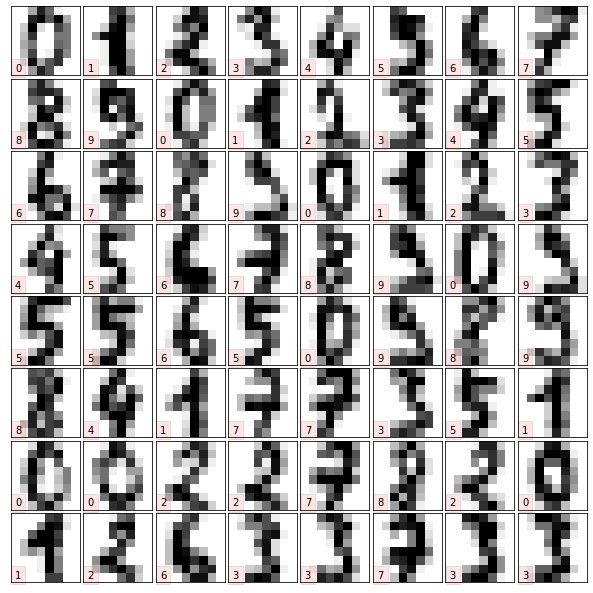

In [110]:
# set up the figure
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]), bbox=dict(facecolor='red', alpha=0.1))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


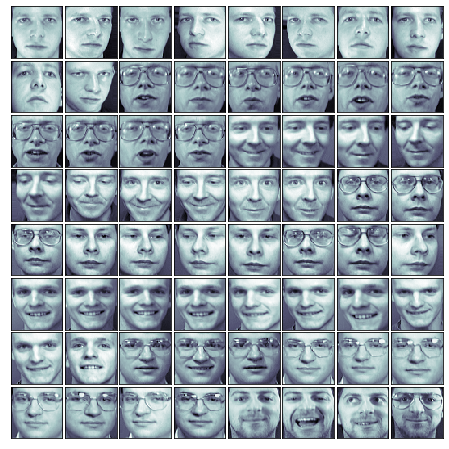

In [111]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces:
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')

In [112]:
# remaining data to simplify code
x, y = faces.data, faces.target

In [113]:
# Step 1
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

In [114]:
# Step 2, train
clf.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [115]:
# Step 3, predict
y_pred = clf.predict(x)

In [116]:
# Step 4, Evaluate 
accuracy = np.mean(y_pred == y)
print("accuracy = %.2f" %accuracy)

accuracy = 0.59


In [117]:
# train-test-split

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [119]:
print("Number of training data: %d" % X_train.shape[0])
print("Number of test data: %d" % X_test.shape[0])

Number of training data: 300
Number of test data: 100


In [120]:
# Step 1
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), verbose=True, max_iter=400)

In [121]:
# step 2- train
clf.fit(X_train, y_train)

Iteration 1, loss = 3.79563223
Iteration 2, loss = 3.81333266
Iteration 3, loss = 3.74344247
Iteration 4, loss = 3.68292202
Iteration 5, loss = 3.64323861
Iteration 6, loss = 3.60442613
Iteration 7, loss = 3.57816113
Iteration 8, loss = 3.53101953
Iteration 9, loss = 3.49547624
Iteration 10, loss = 3.43874500
Iteration 11, loss = 3.39698295
Iteration 12, loss = 3.33429561
Iteration 13, loss = 3.28130351
Iteration 14, loss = 3.20006466
Iteration 15, loss = 3.13769679
Iteration 16, loss = 3.08253922
Iteration 17, loss = 3.00389198
Iteration 18, loss = 2.89321809
Iteration 19, loss = 2.79779001
Iteration 20, loss = 2.72660257
Iteration 21, loss = 2.60973768
Iteration 22, loss = 2.52064467
Iteration 23, loss = 2.43013319
Iteration 24, loss = 2.37197580
Iteration 25, loss = 2.24383833
Iteration 26, loss = 2.17200104
Iteration 27, loss = 2.07516570
Iteration 28, loss = 1.95500672
Iteration 29, loss = 1.87967658
Iteration 30, loss = 1.82047861
Iteration 31, loss = 1.76383137
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=400, verbose=True)

In [122]:
y_pred = clf.predict(X_test)
print("accuracy = %.2f" %np.mean(y_pred == y_test))

accuracy = 0.87


# cifar10- sklearn

In [123]:
X_train, y_train, X_test, y_test = load_cifar10('/content/drive/MyDrive/numpy/cifar-10-batches-py')

In [124]:
# step 1
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), verbose=True, max_iter=300)

In [125]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [126]:
xx_train = X_train.reshape(50000, 3072)

In [127]:
# step 2
clf.fit(xx_train, y_train)

Iteration 1, loss = 10.04300694
Iteration 2, loss = 3.89415305
Iteration 3, loss = 2.51273630
Iteration 4, loss = 2.11770626
Iteration 5, loss = 1.97728912
Iteration 6, loss = 1.92439305
Iteration 7, loss = 1.86411279
Iteration 8, loss = 1.86205524
Iteration 9, loss = 1.83526620
Iteration 10, loss = 1.85189750
Iteration 11, loss = 1.84886639
Iteration 12, loss = 1.78932381
Iteration 13, loss = 1.78128773
Iteration 14, loss = 1.78873881
Iteration 15, loss = 4.09354318
Iteration 16, loss = 1.97917220
Iteration 17, loss = 1.94333354
Iteration 18, loss = 1.91244914
Iteration 19, loss = 1.90401799
Iteration 20, loss = 1.89102915
Iteration 21, loss = 1.88801577
Iteration 22, loss = 1.89394712
Iteration 23, loss = 1.87936976
Iteration 24, loss = 1.87969710
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=300, verbose=True)

In [128]:
print(X_test.shape)

(10000, 32, 32, 3)


In [129]:
xx_test = X_test.reshape(10000, 3072)

In [130]:
y_predd = clf.predict(xx_test)

In [131]:
accuracy = np.mean(y_test == y_predd)
print('accuracy = %.2f' %accuracy)

accuracy = 0.31


In [132]:
from sklearn.metrics import accuracy_score
print('accuracy = %.2f' %accuracy_score(y_test, y_predd))

accuracy = 0.31


In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predd)
print(cm)

[[413  61   4  57  29  80  21  66 225  44]
 [ 50 438   1  79  18  36  52  32 121 173]
 [144  35   5 162 275  83 134  95  40  27]
 [ 49  81   8 289 118 179 146  62  24  44]
 [ 59  31   5 154 382  46 161 107  37  18]
 [ 46  58   2 257 140 261 125  74  22  15]
 [ 11  59   0 203 347  51 271  29  10  19]
 [ 60  37   9 122 172  60  84 334  45  77]
 [299 123   1  49   1  77  10  14 360  66]
 [ 53 235   1  38  20  24  44  46 180 359]]


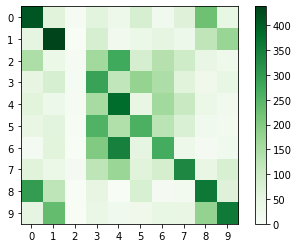

In [135]:
# confusion metrix for cifar10
plt.imshow(cm, interpolation='nearest',  cmap=plt.cm.Greens)
plt.xticks(range(10))
plt.yticks(range(10))
plt.colorbar();